In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Preparing the Data

First we set some pandas options to prevent columns from being ommitted in cell outputs.

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Next we load the data for analysis. This data set is publicly available at the Open Baltimore portal [here](https://data.baltimorecity.gov/datasets/baltimore::real-property-information-2/about). The data used in this analysis was published on November 24, 2025.

In [3]:
raw_data = pd.read_csv('./data/Real_Property_Information.csv', index_col='OBJECTID', low_memory=False)
raw_data

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0001001,0001001,0001 001,0001,001,15,370,329,172000,10200.0,151600,0,0,0.0,0.0,0.0,0.0,N,2,15-2X83-10,NaN,10200,161800,0,0,0,,00,C,C-1,11135,172000,,,192.64,3866.56,N,MB 25915,0340,5222023,NaN,NORTH AVE MARKET LLC,,,2045 W NORTH AVE,W,NORTH,AVE,2045.0,,,0.0,,21217,1221,3052,0,0,0,1,0,0,,,250000,,EASTERWOOD,7,1920,4344.0,11162025,F,0.0,1,http://sdat.dat.maryland.gov/realproperty/pages/viewdetails.aspx?County=03&SearchType=ACCT&Ward=15&SECTION=37&BLOCK=0001&LOT=001,https://gis.baltimorecity.gov/zoning/blockplats/0001.pdf,"1639 MORELAND AVE, 21216",NaN
2,0001002,0001002,0001 002,0001,002,15,370,329,49500,7000.0,42500,0,0,0.0,0.0,0.0,0.0,N,2,14X83-10,NaN,7000,42500,0,0,0,,00,C,C-1,11135,49500,,,55.44,1112.76,N,MB 25915,0340,5222023,NaN,NORTH AVE MARKET LLC,,,2043 W NORTH AVE,W,NORTH,AVE,2043.0,,,0.0,,21217,1221,0,0,0,0,1,0,0,,,250000,,EASTERWOOD,7,0,0.0,11162025,F,0.0,1,http://sdat.dat.maryland.gov/realproperty/pages/viewdetails.aspx?County=03&SearchType=ACCT&Ward=15&SECTION=37&BLOCK=0001&LOT=002,https://gis.baltimorecity.gov/zoning/blockplats/0001.pdf,"1639 MORELAND AVE, 21216",NaN
3,0001003,0001003,0001 003,0001,003,15,370,377,9000,3000.0,8000,0,0,0.0,0.0,0.0,0.0,N,2,14X83-10,NaN,2000,7000,0,0,0,,00,R,OR-1*,11130,9000,,,10.08,202.32,N,RHB03281,0600,10171975,NaN,NEW YORK INC,,,2041 W NORTH AVE,W,NORTH,AVE,2041.0,,,0.0,,21217,1221,1008,0,0,0,1,0,0,,,0,,EASTERWOOD,7,1915,0.0,11162025,,0.0,1,http://sdat.dat.maryland.gov/realproperty/pages/viewdetails.aspx?County=03&SearchType=ACCT&Ward=15&SECTION=37&BLOCK=0001&LOT=003,https://gis.baltimorecity.gov/zoning/blockplats/0001.pdf,"HILTON PLAZA STE 201, 21208",Y
4,0001004,0001004,0001 004,0001,004,15,370,377,9000,3000.0,8000,0,0,0.0,0.0,0.0,0.0,N,2,14X83-10,NaN,2000,7000,0,0,0,,00,R,OR-1*,11136,9000,,,10.08,202.32,N,FMC16697,0295,11132014,NaN,"MUHAMMAD, ANNA AVON",,,2039 W NORTH AVE,W,NORTH,AVE,2039.0,,,0.0,,21217,1221,0,0,0,0,1,0,0,,,0,,EASTERWOOD,7,1920,0.0,11162025,L,120.0,1,http://sdat.dat.maryland.gov/realproperty/pages/viewdetails.aspx?County=03&SearchType=ACCT&Ward=15&SECTION=37&BLOCK=0001&LOT=004,https://gis.baltimorecity.gov/zoning/blockplats/0001.pdf,"9726 MENDOZA RD RANDALLSTOWN, MD, 21133",Y
5,0001005,0001005,0001 005,0001,005,15,370,377,80100,4000.0,19000,0,0,0.0,0.0,0.0,0.0,N,2,14X83-10,NaN,16000,64100,0,0,0,,00,R,OR-1*,11136,80100,,,89.71,1800.65,N,MB 23210,0334,6042021,NaN,"WHITE CARR DEVELOPMENT GROUP,","LLC, THE",,2037 W NORTH AVE,W,NORTH,AVE,2037.0,,,0.0,,21217,1221,5410,0,0,0,0,0,0,,,70000,,EASTERWOOD,7,1920,0.0,11162025,F,0.0,1,http://sdat.dat.maryland.gov/realproperty/pages/viewdetails.aspx?County=03&SearchType=ACCT&Ward=15&SECTION=37&BLOCK=0001&LOT=005,https://gis.baltimorecity.gov/zoning/blockplats/0001.pdf,"2601 PENNSYLVANIA AVE, 21217",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238473,PSC0085,PSC0085,PSC0 085,PSC0,085,50,0,325,0,0.0,0,0,0,0.0,0.0,0.0,0.0,N,2,41.683 ACRES,Y,0,0,0,0,0,,00,I,I-2,91020,0,,,0.00,0.00,N,XAC26378,0354,110120

## Fields of Interest

Next we take a closer look at the most interesting or useful fields in this data set. The data dictionary for this data set is publicly available at the Open Baltimore portal [here](https://data.baltimorecity.gov/documents/17e4f1054a874677934885b1420621a5/about).

### DISTSWCH

Special benefits district indicator. Indicates if the property is in a special benefits district where property owners pay a surcharge on Baltimore City property taxes to fund cleaning, greening, security services, and neighborhood advocacy.

In [4]:
raw_data['DISTSWCH'].value_counts(dropna=False)

DISTSWCH
     228857
Y      9223
N       397
Name: count, dtype: int64

### DIST_ID

Special benefits district ID.

In [5]:
raw_data['DIST_ID'].value_counts(dropna=False)

DIST_ID
     228857
4      4042
3      3421
1      1135
2       429
5       354
7       156
6        83
Name: count, dtype: int64

In [6]:
# The `DIST_ID` field frequently groups together properties that in no way share a common SBD.
# This means that it is difficult to use directly.
raw_data[raw_data['DIST_ID'] == '4']['NEIGHBOR'].value_counts(dropna=False)

NEIGHBOR
MID-TOWN BELVEDERE                           1795
BOLTON HILL                                  1058
MOUNT VERNON                                  612
MADISON PARK                                  247
CHARLES NORTH                                 199
GREENMOUNT WEST                                85
DRUID HEIGHTS                                  21
BARCLAY                                        12
FEDERAL HILL                                    3
SHIPLEY HILL                                    2
BOYD-BOOTH                                      1
ARCADIA                                         1
REMINGTON                                       1
DOWNTOWN                                        1
MADISON-EASTEND                                 1
WASHINGTON VILLAGE/PIGTOWN                      1
UPTON                                           1
CEDONIA                                         1
Name: count, dtype: int64

### NO_IMPRV

Vacant lot proxy. 'Y' if assessed improvements total $0. All Y’s are vacant lots and have no building.

In [7]:
raw_data['NO_IMPRV'].value_counts(dropna=False)

NO_IMPRV
NaN    217450
Y       21027
Name: count, dtype: int64

### VACIND

Indicates if the structure on the property is designated as vacant.

In [8]:
raw_data['VACIND'].value_counts(dropna=False)

VACIND
NaN    208420
N       17844
Y       12213
Name: count, dtype: int64

### USEGROUP

SDAT land use type. Further information is available at the SDAT website [here](https://dat.maryland.gov/Pages/ProcedureDetails_Copy(1).aspx?LID=36).

In [9]:
raw_data['USEGROUP'].value_counts(dropna=False)

USEGROUP
R     194144
U      12999
E      12432
C       8816
EC      4159
M       2471
I       2279
CC       736
         386
RC        30
CR        25
Name: count, dtype: int64

### ZONECODE

Baltimore City zoning code. More information is available at the Baltimore City website [here](https://planning.baltimorecity.gov/zoning-code-quick-guide).

In [10]:
raw_data['ZONECODE'].value_counts(dropna=False).to_dict()

{'R-8  ': 72079,
 'R-6  ': 54828,
 'R-7  ': 21791,
 'R-5  ': 18968,
 'R-3  ': 18622,
 'R-4  ': 8609,
 'R-1  ': 6542,
 'C-1  ': 5902,
 'C-2  ': 3773,
 'R-1-E': 3231,
 'R-9  ': 2423,
 'C-5DC': 2131,
 'C-2* ': 1705,
 'OR-2 ': 1665,
 '     ': 1596,
 'I-2  ': 1584,
 'R-1-D': 1278,
 'I-1  ': 1260,
 'R-10 ': 1231,
 'OS   ': 971,
 'OR-1 ': 947,
 'R-8* ': 746,
 'IMU-1': 628,
 'OR-1*': 512,
 'C-3  ': 462,
 'BSC  ': 426,
 'TOD-2': 422,
 'MI   ': 389,
 'H    ': 386,
 'TOD-4': 385,
 'PC-3 ': 378,
 'R-1-C': 369,
 'EC-2 ': 276,
 'C-4  ': 262,
 'R-2  ': 152,
 'R-7* ': 149,
 'C-5HT': 147,
 'C-5TO': 145,
 'R-4* ': 117,
 'TOD-1': 112,
 'C-5HS': 107,
 'R-1-B': 105,
 'C-1-E': 103,
 'OIC  ': 94,
 'C-5DE': 78,
 'R-3* ': 50,
 'R-1* ': 49,
 'R-6* ': 45,
 'C-1VC': 40,
 'PC-2 ': 31,
 'EC-1 ': 29,
 'IMU-2': 22,
 'R-1-A': 16,
 'C-5IH': 15,
 'C-5-G': 13,
 'C5TO*': 12,
 'TOD4*': 11,
 'C5DC*': 11,
 'PC-4 ': 10,
 'PC-1 ': 8,
 'R-1E*': 7,
 'OR-2*': 7,
 'C-1E*': 6,
 'TOD-3': 3,
 'R-5* ': 3,
 'OS*  ': 2,
 'C2*  ': 1}

### SALEPRIC

Sale price.

In [11]:
raw_data['SALEPRIC'].value_counts(dropna=False)

SALEPRIC
0           69222
50000        1443
60000        1369
75000        1258
65000        1252
            ...  
34895000        1
441450          1
375100          1
78548           1
107530          1
Name: count, Length: 16586, dtype: int64

In [12]:
raw_data[raw_data['SALEPRIC'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### NEIGHBOR

Neighborhood that the property is in.

In [13]:
raw_data['NEIGHBOR'].value_counts(dropna=False)

NEIGHBOR
CANTON                                       6470
BELAIR-EDISON                                6282
FRANKFORD                                    4194
SANDTOWN-WINCHESTER                          3921
BROADWAY EAST                                3841
                                             ... 
PURNELL                                         4
PATTERSON PARK                                  3
DRUID HILL PARK                                 3
HERRING RUN PARK                                2
GREENMOUNT CEMETERY                             1
Name: count, Length: 280, dtype: int64

In [14]:
raw_data[raw_data['NEIGHBOR'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### FULLADDR

Full address of the property.

In [15]:
raw_data['FULLADDR'].value_counts(dropna=False)

FULLADDR
                        7339
1101 HORNERS LANE        832
1000 HORNERS LANE        682
4100 N CHARLES ST        660
3801 CANTERBURY ROAD     370
                        ... 
124 N MONASTERY AVE        1
126 N MONASTERY AVE        1
128 N MONASTERY AVE        1
130 N MONASTERY AVE        1
4404 WAKEFIELD ROAD        1
Name: count, Length: 217094, dtype: int64

In [16]:
raw_data[raw_data['FULLADDR'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### FULLCASH

Full cash value.

In [17]:
raw_data['FULLCASH'].value_counts(dropna=False)

FULLCASH
0          221224
1000         4258
7000          474
2000          350
500           242
            ...  
509400          1
5502800         1
1206300         1
2273600         1
70600           1
Name: count, Length: 4571, dtype: int64

In [18]:
raw_data[raw_data['FULLCASH'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### TAXBASE

The total of phase-in assessments. $\text{Tax Base} + \text{Full Cash} = \text{Assessed Value}$, which is updated every 3 years for each property.

In [19]:
raw_data['TAXBASE'].value_counts(dropna=False)

TAXBASE
0          18294
1000        3282
65100       2100
50100       1867
55200       1699
           ...  
174503         1
603400         1
5044233        1
353833         1
1672500        1
Name: count, Length: 21455, dtype: int64

In [20]:
raw_data[raw_data['TAXBASE'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### ARTAXBAS

The taxable assessment taken from the previous year.

In [21]:
raw_data['ARTAXBAS'].value_counts(dropna=False)

ARTAXBAS
0          18212
1000        3285
65100       2098
50100       1867
55200       1699
           ...  
486467         1
485900         1
460233         1
443867         1
1672500        1
Name: count, Length: 21532, dtype: int64

In [22]:
raw_data[raw_data['ARTAXBAS'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### PERMHOME

Whether the property is occupied by its owner, a renter, or both. ‘H’ = owner occupied, ‘D’ = dual owner and renter (multiple units), ‘N’ = renter occupied.

In [23]:
raw_data['PERMHOME'].value_counts(dropna=False)

PERMHOME
N    127273
H    110685
D       519
Name: count, dtype: int64

### AR_OWNER

Occupancy type from the previous year.

In [24]:
raw_data['AR_OWNER'].value_counts(dropna=False)

AR_OWNER
N    127232
H    110726
D       519
Name: count, dtype: int64

In [25]:
# Only 145 records have the occupant type changing.
len(raw_data[raw_data['AR_OWNER'] != raw_data['PERMHOME']])

145

### YEAR_BUILD

Year built.

In [26]:
raw_data['YEAR_BUILD'].value_counts(dropna=False)

YEAR_BUILD
1920    41523
0       39820
1900    18514
1915     6021
1925     5180
        ...  
1804        1
1812        1
1808        1
1791        1
1836        1
Name: count, Length: 221, dtype: int64

In [27]:
raw_data[raw_data['YEAR_BUILD'].isna()]

,PIN,PINRELATE,BLOCKLOT,BLOCK,LOT,WARD,SECTION,ASSESSOR,TAXBASE,BFCVLAND,BFCVIMPR,LANDEXMP,IMPREXMP,CITYCRED,STATCRED,CCREDAMT,SCREDAMT,PERMHOME,ASSESGRP,LOT_SIZE,NO_IMPRV,CURRLAND,CURRIMPR,EXMPLAND,EXMPIMPR,FULLCASH,EXMPTYPE,EXMPCODE,USEGROUP,ZONECODE,SDATCODE,ARTAXBAS,DISTSWCH,DIST_ID,STATETAX,CITY_TAX,AR_OWNER,DEEDBOOK,DEEDPAGE,SALEDATE,OWNER_ABBR,OWNER_1,OWNER_2,OWNER_3,FULLADDR,STDIRPRE,ST_NAME,ST_TYPE,BLDG_NO,FRACTION,UNIT_NUM,SPAN_NUM,SPANFRAC,ZIP_CODE,EXTD_ZIP,DHCDUSE1,DHCDUSE2,DHCDUSE3,DHCDUSE4,DWELUNIT,EFF_UNIT,ROOMUNIT,RPDELTAG,RESPAGCY,SALEPRIC,PROPDESC,NEIGHBOR,SRVCCNTR,YEAR_BUILD,STRUCTAREA,LDATE,OWNMDE,GRNDRENT,SUBTYPE_GEODB,SDATLINK,BLOCKPLAT,MAILTOADD,VACIND
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### SUBTYPE_GEODB

Indicates if a property is a single-family or multi-unit holding. 1 = Normal Lot: single structure or single address; 2 = Complex Lot: mult-unit structures, such as condominiums, and apartment buildings.

In [28]:
raw_data['SUBTYPE_GEODB'].value_counts(dropna=False)

SUBTYPE_GEODB
1    223143
2     15334
Name: count, dtype: int64

### STRUCTAREA

Structure square footage.

In [29]:
raw_data['STRUCTAREA'].value_counts(dropna=False)

STRUCTAREA
0.0        65978
1024.0      4881
1280.0      4539
1200.0      4239
1152.0      3835
           ...  
613.0          1
10850.0        1
7928.0         1
27639.0        1
3887.0         1
Name: count, Length: 7524, dtype: int64

In [31]:
# Some records don't have any square footage listed at all.
len(raw_data[raw_data['STRUCTAREA'].isna()])

1669

### OWNMDE

Ownership mode of the property. 'F' = Fee simple, 'L' = Leasehold, '3' = Contracted Lease to M&CC from a third party.

In [32]:
raw_data['OWNMDE'].value_counts(dropna=False)

OWNMDE
F    150906
L     58349
      29221
3         1
Name: count, dtype: int64

### LOT_SIZE

Size of lot.

In [33]:
# The formatting of values in the `LOT_SIZE` column are inconsistent and therefore not easily interpretable.
raw_data['LOT_SIZE'].value_counts(dropna=False)

LOT_SIZE
14X70                 2770
50X150                1854
14X100                1806
14X80                 1801
16X100                1762
                      ... 
838.99 SQ FT             1
712.09 SQ FT             1
896.03 SQ FT             1
714.64 SQ FT             1
14-3X93-5                1
Name: count, Length: 59568, dtype: int64

### LDATE

Date last updated.

In [34]:
# The `LDATE` field is constant and therefore uninformative.
raw_data['LDATE'].value_counts(dropna=False)

LDATE
11162025    238477
Name: count, dtype: int64

Next we use the findings from the above cursory analysis to create a slightly cleaner version of the original data set. This new data set contains the same number of records as the original, but not as many columns.

In [35]:
residential_sdat_codes = ['R ', 'M ', 'U ', 'RC', 'CR', 'TH']

residential_zone_codes = [
    'R-1  ',
    'R-1-A',
    'R-1-B',
    'R-1-C',
    'R-1-D',
    'R-1-E',
    'R-2  ',
    'R-3  ',
    'R-4  ',
    'R-5  ',
    'R-6  ',
    'R-7  ',
    'R-8  ',
    'R-9  ',
    'R-10 ',
    'OR-1 ',
    'OR-2 ',
]

starred_residential_zone_codes = [
    'R-1* ',
    'R-2* ',
    'R-3* ',
    'R-4* ',
    'R-5* ',
    'R-6* ',
    'R-7* ',
    'R-8* ',
    'R-9* ',
    'R-10*',
    'OR-1*',
    'OR-2*',
]

data = pd.DataFrame({
    'has_sbd': raw_data['DISTSWCH'] == 'Y',
    'sbd_id': raw_data['DIST_ID'].map(lambda x: np.nan if x == ' ' else x),
    'no_improvements': raw_data['NO_IMPRV'] == 'Y',
    'is_vacant': raw_data['VACIND'] == 'Y',
    'is_sdat_residential': raw_data['USEGROUP'].isin(residential_sdat_codes),
    'is_zoned_residential': raw_data['ZONECODE'].isin(residential_zone_codes + starred_residential_zone_codes),
    'is_starred_residential': raw_data['ZONECODE'].isin(starred_residential_zone_codes),
    'sale_price': raw_data['SALEPRIC'],
    'log_sale_price': raw_data['SALEPRIC'].map(lambda x: np.nan if x <= 0.0 else np.log(x)),
    'has_sale_price': raw_data['SALEPRIC'] > 0.0,
    'neighborhood': raw_data['NEIGHBOR'].map(lambda x: x.strip()),
    'is_midtown_sbd': raw_data['NEIGHBOR'].map(lambda x: x.strip()).isin(['MOUNT VERNON', 'MID-TOWN BELVEDERE', 'CHARLES NORTH', 'BOLTON HILL', 'MADISON PARK', 'GREENMOUNT WEST', 'DRUID HEIGHTS', 'UPTON']) & (raw_data['DIST_ID'] == '4'),
    'is_mount_vernon': raw_data['NEIGHBOR'].map(lambda x: x.strip()) == 'MOUNT VERNON',
    'is_midtown_belvedere': raw_data['NEIGHBOR'].map(lambda x: x.strip()) == 'MID-TOWN BELVEDERE',
    'address': raw_data['FULLADDR'].map(lambda x: np.nan if x == ' ' else x),
    'assessment': raw_data['TAXBASE'] + raw_data['FULLCASH'],
    'log_assessment': (raw_data['TAXBASE'] + raw_data['FULLCASH']).map(lambda x: np.nan if x <= 0.0 else np.log(x)),
    'has_assessment': raw_data['TAXBASE'] + raw_data['FULLCASH'] > 0.0,
    'previous_assessment': raw_data['ARTAXBAS'],
    'has_previous_assessment': raw_data['ARTAXBAS'] > 0.0,
    'occupant_type': raw_data['PERMHOME'],
    'previous_occupant_type': raw_data['AR_OWNER'],
    'year_built': raw_data['YEAR_BUILD'].map(lambda x: np.nan if x == 0 else x),
    'has_year_built': raw_data['YEAR_BUILD'] > 0,
    'is_single_family': raw_data['SUBTYPE_GEODB'].map(lambda x: x == 1),
    'square_footage': raw_data['STRUCTAREA'],
    'has_square_footage': raw_data['STRUCTAREA'] > 0.0,
    'ownership_mode': raw_data['OWNMDE'].map(lambda x: np.nan if x == ' ' else x),
})

data

,has_sbd,sbd_id,no_improvements,is_vacant,is_sdat_residential,is_zoned_residential,is_starred_residential,sale_price,log_sale_price,has_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,has_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,NaN,False,False,False,False,False,250000,12.429216,True,EASTERWOOD,False,False,False,2045 W NORTH AVE,172000,12.055250,True,172000,True,N,N,1920.0,True,True,4344.0,True,F
2,False,NaN,False,False,False,False,False,250000,12.429216,True,EASTERWOOD,False,False,False,2043 W NORTH AVE,49500,10.809728,True,49500,True,N,N,NaN,False,True,0.0,False,F
3,False,NaN,False,True,True,True,True,0,NaN,False,EASTERWOOD,False,False,False,2041 W NORTH AVE,9000,9.104980,True,9000,True,N,N,1915.0,True,True,0.0,False,NaN
4,False,NaN,False,True,True,True,True,0,NaN,False,EASTERWOOD,False,False,False,2039 W NORTH AVE,9000,9.104980,True,9000,True,N,N,1920.0,True,True,0.0,False,L
5,False,NaN,False,False,True,True,True,70000,11.156251,True,EASTERWOOD,False,False,False,2037 W NORTH AVE,80100,11.291031,True,80100,True,N,N,1920.0,True,True,0.0,False,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238473,False,NaN,True,False,False,False,False,0,NaN,False,PULASKI INDUSTRIAL AREA,False,False,False,NaN,0,NaN,False,0,False,N,N,NaN,False,True,0.0,False,NaN
238474,False,NaN,True,False,False,False,False,0,NaN,False,PULASKI INDUSTRIAL AREA,False,False,False,NaN,0,NaN,False,0,False,N,N,NaN,False,True,0.0,False,NaN
238475,False,NaN,True,False,False,False,False,0,NaN,False,PULASKI INDUSTRIAL AREA,False,False,False,NaN,0,NaN,False,0,False,N,N,NaN,False,True,0.0,False,NaN


Next we filter the data used in our analysis. We consider only intact, nonvacant residential properties. We also require that all properties of interest have an assessment value and a sale price recorded in the data set.

In [41]:
filtered_data = data[data['is_sdat_residential'] & data['is_zoned_residential'] & ~data['is_vacant'] & ~data['no_improvements'] & data['has_assessment'] & data['has_sale_price']].drop(columns=[
    'is_sdat_residential',
    'is_zoned_residential',
    'is_vacant',
    'no_improvements',
    'has_assessment',
    'has_sale_price'
])
filtered_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
5,False,NaN,True,70000,11.156251,EASTERWOOD,False,False,False,2037 W NORTH AVE,80100,11.291031,80100,True,N,N,1920.0,True,True,0.0,False,F
6,False,NaN,True,62000,11.034890,EASTERWOOD,False,False,False,2035 W NORTH AVE,80100,11.291031,80100,True,N,N,1915.0,True,True,0.0,False,F
10,False,NaN,True,60000,11.002100,EASTERWOOD,False,False,False,2027 W NORTH AVE,80100,11.291031,80100,True,N,N,1915.0,True,True,0.0,False,L
11,False,NaN,True,63000,11.050890,EASTERWOOD,False,False,False,2025 W NORTH AVE,27000,10.203592,27000,True,N,N,1900.0,True,True,0.0,False,L
12,False,NaN,True,155000,11.951180,EASTERWOOD,False,False,False,2023 W NORTH AVE,27000,10.203592,27000,True,N,N,1915.0,True,True,0.0,False,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238334,False,NaN,False,20000,9.903488,WEST FOREST PARK,False,False,False,4502 WAKEFIELD ROAD,59900,11.000432,59900,True,N,N,1927.0,True,True,1154.0,True,F
238336,False,NaN,False,228000,12.337101,WEST FOREST PARK,False,False,False,4412 WAKEFIELD ROAD,150300,11.920389,150300,True,H,H,1927.0,True,True,1154.0,True,L
238338,False,NaN,False,155000,11.951180,WEST FOREST PARK,False,False,False,4408 WAKEFIELD ROAD,156100,11.958252,156100,True,H,H,1927.0,True,True,1154.0,True,L


In [42]:
filtered_data.to_csv('./data/residential_property_data.csv')

# Analyzing the Data

## Conditioning on `has_sbd`

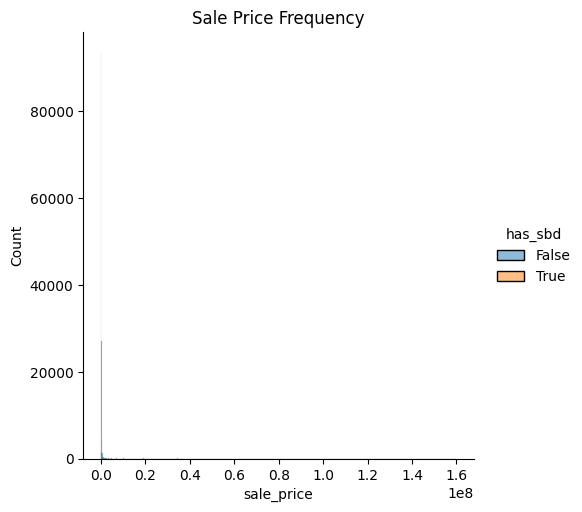

In [104]:
p = sns.displot(filtered_data, x='sale_price', hue='has_sbd')
plt.title('Sale Price Frequency')
plt.show()

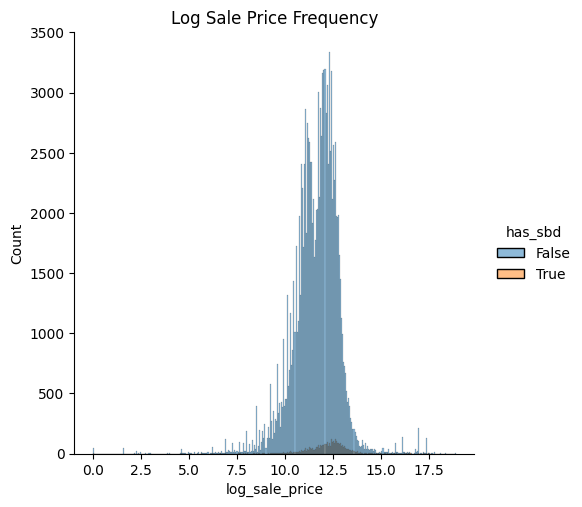

In [107]:
sns.displot(filtered_data, x='log_sale_price', hue='has_sbd')
plt.title('Log Sale Price Frequency')
plt.show()

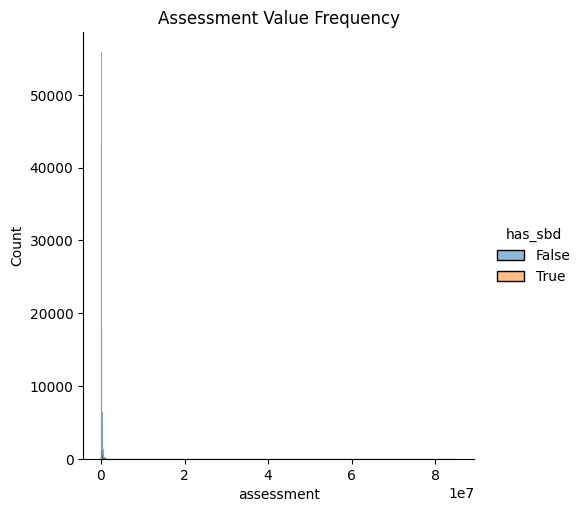

In [108]:
sns.displot(filtered_data, x='assessment', hue='has_sbd')
plt.title('Assessment Value Frequency')
plt.show()

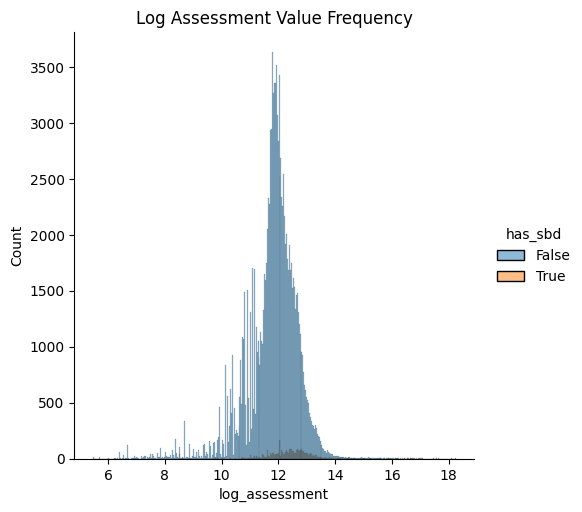

In [109]:
sns.displot(filtered_data, x='log_assessment', hue='has_sbd')
plt.title('Log Assessment Value Frequency')
plt.show()

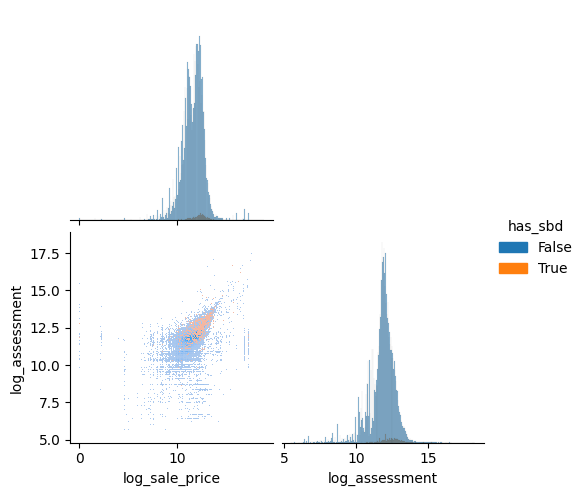

In [111]:
sns.pairplot(filtered_data, x_vars=['log_sale_price', 'log_assessment'], y_vars=['log_sale_price', 'log_assessment'], hue='has_sbd', kind='hist', corner=True)
plt.show()

In [57]:
sbd_data = filtered_data[filtered_data['has_sbd']]
sbd_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
16729,True,4,False,81000,11.302204,DRUID HEIGHTS,True,False,False,2100 MADISON AVE,1221700,14.015754,0,False,N,N,NaN,False,True,0.0,False,F
16754,True,4,False,295000,12.594731,MADISON PARK,True,False,False,342 BLOOM ST,2323100,14.658413,0,False,N,N,NaN,False,True,0.0,False,F
16978,True,4,False,530000,13.180632,DRUID HEIGHTS,True,False,False,2008 MADISON AVE,508200,13.138630,508200,True,H,H,1920.0,True,True,4579.0,True,F
16979,True,4,False,60000,11.002100,DRUID HEIGHTS,True,False,False,2010 MADISON AVE,165000,12.013701,165000,True,H,H,1920.0,True,True,3076.0,True,F
16982,True,4,False,150000,11.918391,DRUID HEIGHTS,True,False,False,2016 MADISON AVE,165000,12.013701,165000,True,H,H,1920.0,True,True,3076.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135235,True,3,False,6000,8.699515,BETTER WAVERLY,False,False,False,503 E 26TH ST,23000,10.043249,23000,True,N,N,1900.0,True,True,0.0,False,F
135236,True,3,False,50000,10.819778,BETTER WAVERLY,False,False,False,505 E 26TH ST,19000,9.852194,19000,True,N,N,1920.0,True,True,0.0,False,F
135238,True,3,False,140000,11.849398,BETTER WAVERLY,False,False,False,509 E 26TH ST,19000,9.852194,19000,True,H,H,1920.0,True,True,0.0,False,F


In [58]:
non_sbd_data = filtered_data[~filtered_data['has_sbd']]
non_sbd_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
5,False,NaN,True,70000,11.156251,EASTERWOOD,False,False,False,2037 W NORTH AVE,80100,11.291031,80100,True,N,N,1920.0,True,True,0.0,False,F
6,False,NaN,True,62000,11.034890,EASTERWOOD,False,False,False,2035 W NORTH AVE,80100,11.291031,80100,True,N,N,1915.0,True,True,0.0,False,F
10,False,NaN,True,60000,11.002100,EASTERWOOD,False,False,False,2027 W NORTH AVE,80100,11.291031,80100,True,N,N,1915.0,True,True,0.0,False,L
11,False,NaN,True,63000,11.050890,EASTERWOOD,False,False,False,2025 W NORTH AVE,27000,10.203592,27000,True,N,N,1900.0,True,True,0.0,False,L
12,False,NaN,True,155000,11.951180,EASTERWOOD,False,False,False,2023 W NORTH AVE,27000,10.203592,27000,True,N,N,1915.0,True,True,0.0,False,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238334,False,NaN,False,20000,9.903488,WEST FOREST PARK,False,False,False,4502 WAKEFIELD ROAD,59900,11.000432,59900,True,N,N,1927.0,True,True,1154.0,True,F
238336,False,NaN,False,228000,12.337101,WEST FOREST PARK,False,False,False,4412 WAKEFIELD ROAD,150300,11.920389,150300,True,H,H,1927.0,True,True,1154.0,True,L
238338,False,NaN,False,155000,11.951180,WEST FOREST PARK,False,False,False,4408 WAKEFIELD ROAD,156100,11.958252,156100,True,H,H,1927.0,True,True,1154.0,True,L


In [132]:
print(sbd_data['sale_price'].median())
print(non_sbd_data['sale_price'].median())

print(sbd_data['sale_price'].median() - non_sbd_data['sale_price'].median())

225000.0
127000.0
98000.0


In [62]:
print(sbd_data['assessment'].median())
print(non_sbd_data['assessment'].median())

254000.0
147267.0


In [65]:
rng = np.random.default_rng()

def bootstrap_median_ci(data, iter: int=20_000, alpha: float=0.05):
    medians = []
    for _ in range(iter):
        sample = rng.choice(data, size=len(data), replace=True)
        medians.append(np.median(sample))

    lower = np.percentile(medians, 100 * alpha / 2)
    upper = np.percentile(medians, 100 * (1 - alpha / 2))
    return lower, upper

def bootstrap_median_diff_ci(data1, data2, iter: int=20_000, alpha: float=0.05):
    median_diffs = []
    for _ in range(iter):
        sample1 = rng.choice(data1, size=len(data1), replace=True)
        sample2 = rng.choice(data2, size=len(data2), replace=True)
        median_diffs.append(np.median(sample1) - np.median(sample2))

    lower = np.percentile(median_diffs, 100 * alpha / 2)
    upper = np.percentile(median_diffs, 100 * (1 - alpha / 2))
    return lower, upper

In [70]:
print(bootstrap_median_ci(sbd_data['assessment'], alpha=0.005))
print(bootstrap_median_ci(non_sbd_data['assessment'], alpha=0.005))
print(bootstrap_median_diff_ci(sbd_data['assessment'], non_sbd_data['assessment'], alpha=0.005))

(np.float64(246500.0), np.float64(262900.0))
(np.float64(146567.0), np.float64(148133.0))
(np.float64(99333.0), np.float64(115633.16750000016))


In [71]:
print(bootstrap_median_ci(sbd_data['sale_price'], alpha=0.005))
print(bootstrap_median_ci(non_sbd_data['sale_price'], alpha=0.005))
print(bootstrap_median_diff_ci(sbd_data['sale_price'], non_sbd_data['sale_price'], alpha=0.005))

(np.float64(214299.25), np.float64(240000.0))
(np.float64(125000.0), np.float64(129000.0))
(np.float64(86999.75), np.float64(113000.0))


## Conditioning on `is_midtown_sbd`

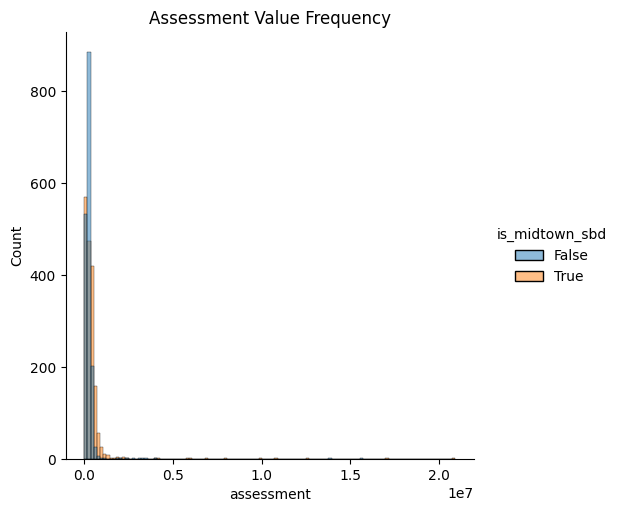

In [115]:
sns.displot(sbd_data, x='assessment', hue='is_midtown_sbd')
plt.title('Assessment Value Frequency')
plt.show()

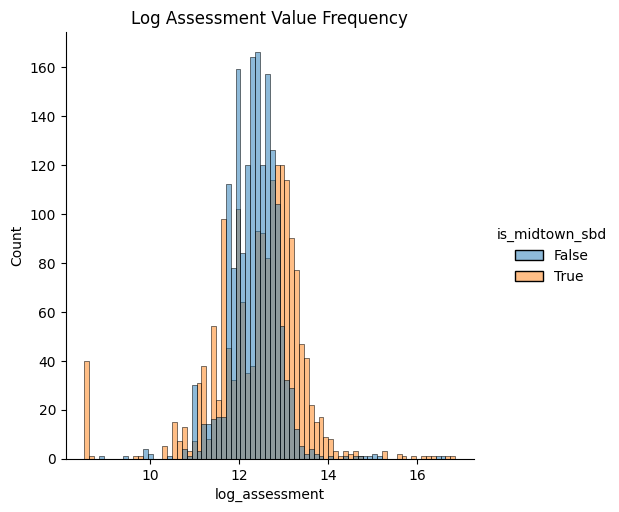

In [116]:
sns.displot(sbd_data, x='log_assessment', hue='is_midtown_sbd')
plt.title('Log Assessment Value Frequency')
plt.show()

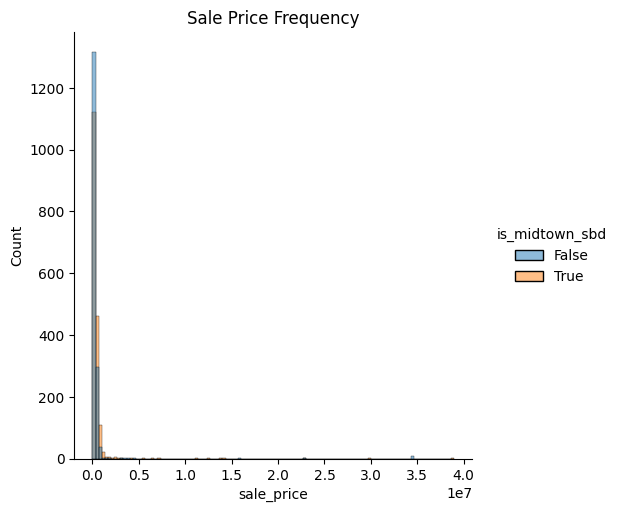

In [117]:
sns.displot(sbd_data, x='sale_price', hue='is_midtown_sbd')
plt.title('Sale Price Frequency')
plt.show()

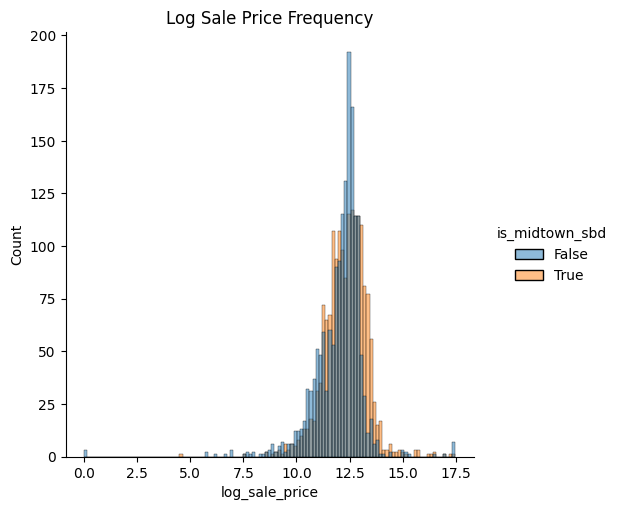

In [118]:
sns.displot(sbd_data, x='log_sale_price', hue='is_midtown_sbd')
plt.title('Log Sale Price Frequency')
plt.show()

In [76]:
midtown_sbd_data = sbd_data[sbd_data['is_midtown_sbd']]
midtown_sbd_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
16729,True,4,False,81000,11.302204,DRUID HEIGHTS,True,False,False,2100 MADISON AVE,1221700,14.015754,0,False,N,N,NaN,False,True,0.0,False,F
16754,True,4,False,295000,12.594731,MADISON PARK,True,False,False,342 BLOOM ST,2323100,14.658413,0,False,N,N,NaN,False,True,0.0,False,F
16978,True,4,False,530000,13.180632,DRUID HEIGHTS,True,False,False,2008 MADISON AVE,508200,13.138630,508200,True,H,H,1920.0,True,True,4579.0,True,F
16979,True,4,False,60000,11.002100,DRUID HEIGHTS,True,False,False,2010 MADISON AVE,165000,12.013701,165000,True,H,H,1920.0,True,True,3076.0,True,F
16982,True,4,False,150000,11.918391,DRUID HEIGHTS,True,False,False,2016 MADISON AVE,165000,12.013701,165000,True,H,H,1920.0,True,True,3076.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24369,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,85500,11.356272,85500,True,N,N,NaN,False,False,855.0,True,F
24370,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,76700,11.247657,76700,True,N,N,NaN,False,False,767.0,True,F
24371,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,76900,11.250261,76900,True,N,N,NaN,False,False,769.0,True,F


In [77]:
non_midtown_sbd_data = sbd_data[~sbd_data['is_midtown_sbd']]
non_midtown_sbd_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
23283,True,2,False,70000,11.156251,MOUNT VERNON,False,True,False,214 W MADISON ST,247600,12.419570,247600,True,N,N,1900.0,True,True,5229.0,True,F
23285,True,2,False,295000,12.594731,MOUNT VERNON,False,True,False,220 W MADISON ST,442900,13.001099,442900,True,N,N,NaN,False,True,0.0,False,F
23770,True,2,False,565000,13.244581,MOUNT VERNON,False,True,False,202 W MONUMENT ST,550100,13.217855,550100,True,N,N,NaN,False,True,0.0,False,F
23771,True,2,False,768000,13.551545,MOUNT VERNON,False,True,False,204 W MONUMENT ST,521700,13.164848,521700,True,N,N,1810.0,True,True,4740.0,True,F
23772,True,2,False,625000,13.345507,MOUNT VERNON,False,True,False,206 W MONUMENT ST,642200,13.372655,642200,True,N,N,NaN,False,True,0.0,False,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135235,True,3,False,6000,8.699515,BETTER WAVERLY,False,False,False,503 E 26TH ST,23000,10.043249,23000,True,N,N,1900.0,True,True,0.0,False,F
135236,True,3,False,50000,10.819778,BETTER WAVERLY,False,False,False,505 E 26TH ST,19000,9.852194,19000,True,N,N,1920.0,True,True,0.0,False,F
135238,True,3,False,140000,11.849398,BETTER WAVERLY,False,False,False,509 E 26TH ST,19000,9.852194,19000,True,H,H,1920.0,True,True,0.0,False,F


In [81]:
print(bootstrap_median_ci(midtown_sbd_data['assessment'], alpha=0.005))
print(bootstrap_median_ci(non_midtown_sbd_data['assessment'], alpha=0.005))
print(bootstrap_median_diff_ci(midtown_sbd_data['assessment'], non_midtown_sbd_data['assessment'], alpha=0.005))

(np.float64(273798.5), np.float64(325800.0))
(np.float64(221600.0), np.float64(240000.0))
(np.float64(41349.75), np.float64(97050.12500000012))


In [89]:
print(bootstrap_median_ci(midtown_sbd_data['sale_price'], alpha=0.005))
print(bootstrap_median_ci(non_midtown_sbd_data['sale_price'], alpha=0.005))
print(bootstrap_median_diff_ci(midtown_sbd_data['sale_price'], non_midtown_sbd_data['sale_price'], alpha=0.005))

(np.float64(220000.0), np.float64(261900.0))
(np.float64(200000.0), np.float64(230000.0))
(np.float64(0.0), np.float64(51140.90000000084))


## Conditioning on `is_mount_vernon`

In [90]:
mv_and_mtb_data = midtown_sbd_data[midtown_sbd_data['is_mount_vernon'] | midtown_sbd_data['is_midtown_belvedere']]
mv_and_mtb_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
20893,True,4,False,740000,13.514405,MID-TOWN BELVEDERE,True,False,True,1304 SAINT PAUL ST,2335300,14.663651,2335300,True,N,N,1900.0,True,True,16743.0,True,F
20894,True,4,False,320000,12.676076,MID-TOWN BELVEDERE,True,False,True,1300 SAINT PAUL ST,618700,13.335376,618700,True,N,N,1880.0,True,True,7216.0,True,F
20895,True,4,False,37000,10.518673,MID-TOWN BELVEDERE,True,False,True,36 E PRESTON ST,118100,11.679287,118100,True,H,H,1900.0,True,True,4320.0,True,F
20896,True,4,False,435000,12.983101,MID-TOWN BELVEDERE,True,False,True,34 E PRESTON ST,450000,13.017003,450000,True,N,N,NaN,False,True,5.0,True,F
20897,True,4,False,999000,13.814510,MID-TOWN BELVEDERE,True,False,True,32 E PRESTON ST,491200,13.104607,491200,True,N,N,1900.0,True,True,4320.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24369,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,85500,11.356272,85500,True,N,N,NaN,False,False,855.0,True,F
24370,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,76700,11.247657,76700,True,N,N,NaN,False,False,767.0,True,F
24371,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,76900,11.250261,76900,True,N,N,NaN,False,False,769.0,True,F


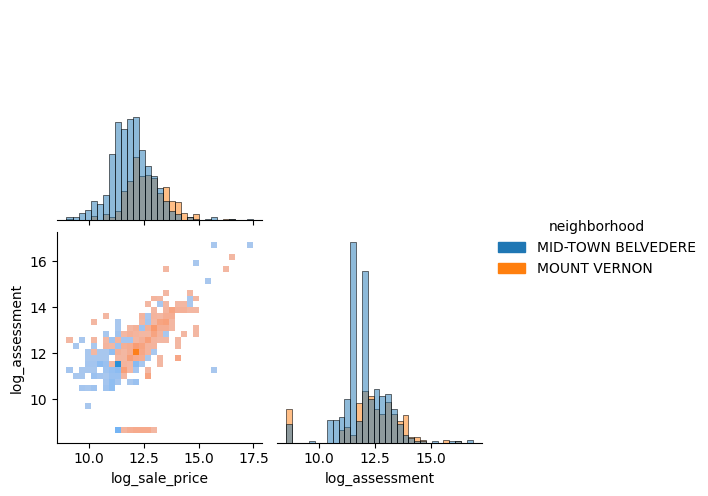

In [127]:
sns.pairplot(
    mv_and_mtb_data,
    x_vars=['log_sale_price', 'log_assessment'],
    y_vars=['log_sale_price', 'log_assessment'],
    hue='neighborhood',
    kind='hist',
    corner=True
)
plt.show()

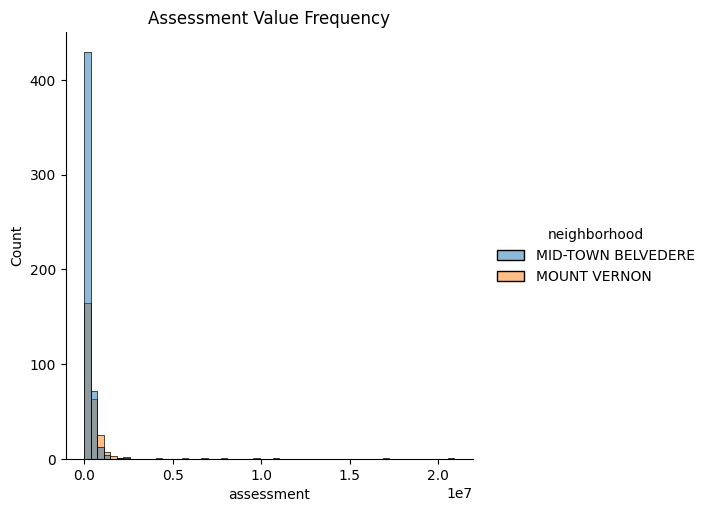

In [128]:
sns.displot(mv_and_mtb_data, x='assessment', hue='neighborhood')
plt.title('Assessment Value Frequency')
plt.show()

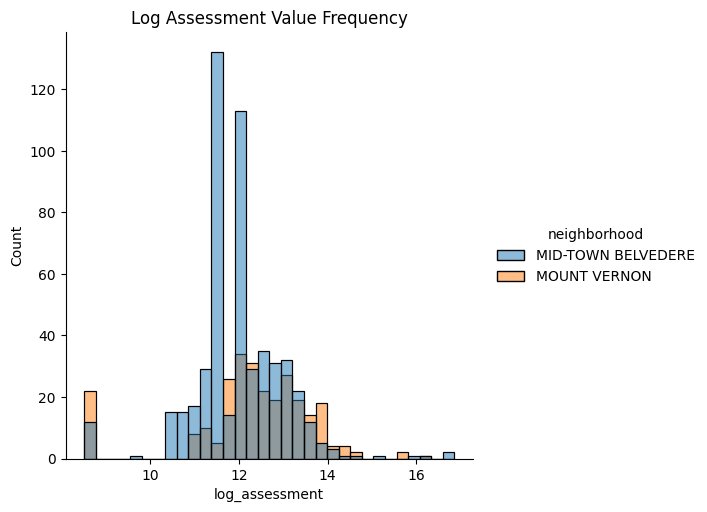

In [129]:
sns.displot(mv_and_mtb_data, x='log_assessment', hue='neighborhood')
plt.title('Log Assessment Value Frequency')
plt.show()

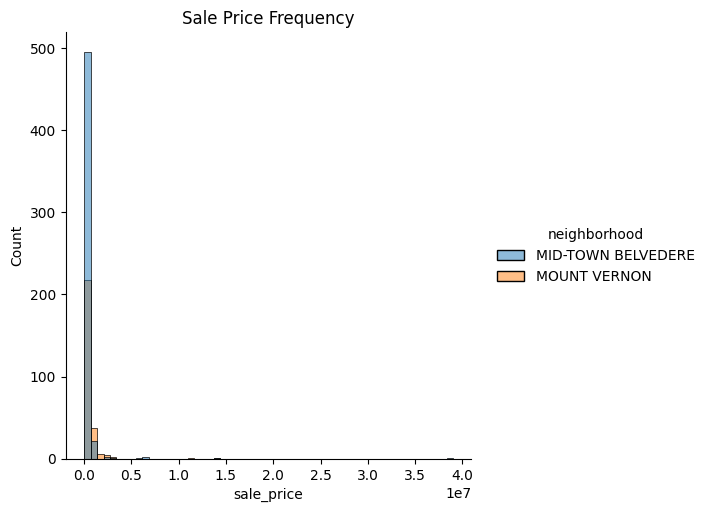

In [130]:
sns.displot(mv_and_mtb_data, x='sale_price', hue='neighborhood')
plt.title('Sale Price Frequency')
plt.show()

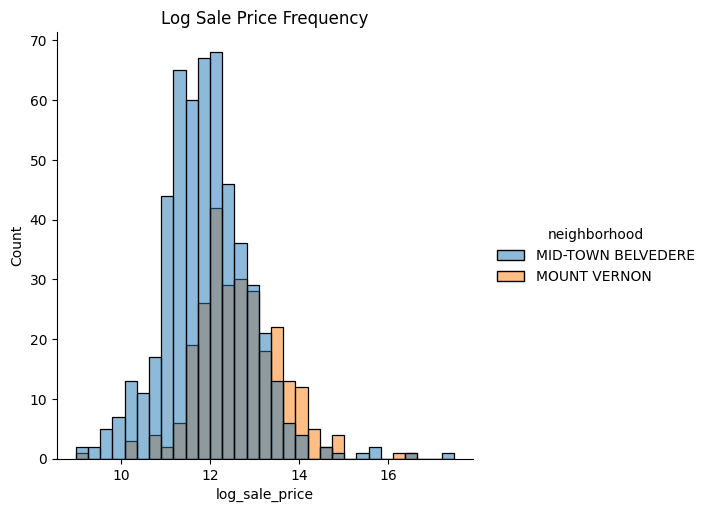

In [131]:
sns.displot(mv_and_mtb_data, x='log_sale_price', hue='neighborhood')
plt.title('Log Sale Price Frequency')
plt.show()

In [96]:
mount_vernon_data = mv_and_mtb_data[mv_and_mtb_data['is_mount_vernon']]
mount_vernon_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
23267,True,4,False,900000,13.710150,MOUNT VERNON,True,True,False,836 PARK AVE,1011800,13.827241,1011800,True,H,H,1900.0,True,True,8096.0,True,F
23268,True,4,False,725000,13.493927,MOUNT VERNON,True,True,False,834 PARK AVE,716200,13.481715,716200,True,N,N,1880.0,True,True,4936.0,True,F
23269,True,4,False,490000,13.102161,MOUNT VERNON,True,True,False,830 PARK AVE,103400,11.546360,103400,True,H,H,1860.0,True,True,2090.0,True,F
23270,True,4,False,511400,13.144907,MOUNT VERNON,True,True,False,828 PARK AVE,525400,13.171915,525400,True,N,N,1900.0,True,True,10430.0,True,F
23271,True,4,False,925000,13.737549,MOUNT VERNON,True,True,False,824 PARK AVE,444600,13.004930,444600,True,H,H,1860.0,True,True,3200.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24369,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,85500,11.356272,85500,True,N,N,NaN,False,False,855.0,True,F
24370,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,76700,11.247657,76700,True,N,N,NaN,False,False,767.0,True,F
24371,True,4,False,95000,11.461632,MOUNT VERNON,True,True,False,517 CATHEDRAL ST,76900,11.250261,76900,True,N,N,NaN,False,False,769.0,True,F


In [97]:
midtown_belvedere_data = mv_and_mtb_data[mv_and_mtb_data['is_midtown_belvedere']]
midtown_belvedere_data

,has_sbd,sbd_id,is_starred_residential,sale_price,log_sale_price,neighborhood,is_midtown_sbd,is_mount_vernon,is_midtown_belvedere,address,assessment,log_assessment,previous_assessment,has_previous_assessment,occupant_type,previous_occupant_type,year_built,has_year_built,is_single_family,square_footage,has_square_footage,ownership_mode
OBJECTID,,,,,,,,,,,,,,,,,,,,,,
20893,True,4,False,740000,13.514405,MID-TOWN BELVEDERE,True,False,True,1304 SAINT PAUL ST,2335300,14.663651,2335300,True,N,N,1900.0,True,True,16743.0,True,F
20894,True,4,False,320000,12.676076,MID-TOWN BELVEDERE,True,False,True,1300 SAINT PAUL ST,618700,13.335376,618700,True,N,N,1880.0,True,True,7216.0,True,F
20895,True,4,False,37000,10.518673,MID-TOWN BELVEDERE,True,False,True,36 E PRESTON ST,118100,11.679287,118100,True,H,H,1900.0,True,True,4320.0,True,F
20896,True,4,False,435000,12.983101,MID-TOWN BELVEDERE,True,False,True,34 E PRESTON ST,450000,13.017003,450000,True,N,N,NaN,False,True,5.0,True,F
20897,True,4,False,999000,13.814510,MID-TOWN BELVEDERE,True,False,True,32 E PRESTON ST,491200,13.104607,491200,True,N,N,1900.0,True,True,4320.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23376,True,4,False,196100,12.186380,MID-TOWN BELVEDERE,True,False,True,851 PARK AVE,292600,12.586562,292600,True,H,H,1900.0,True,True,2376.0,True,F
23377,True,4,False,365000,12.807653,MID-TOWN BELVEDERE,True,False,True,849 PARK AVE,385000,12.860999,385000,True,N,N,1900.0,True,True,2400.0,True,L
23387,True,4,False,53279,10.883298,MID-TOWN BELVEDERE,True,False,True,8 W READ ST,351000,12.768542,351000,True,D,D,1900.0,True,True,7341.0,True,F


In [99]:
print(mount_vernon_data['assessment'].median())
print(midtown_belvedere_data['assessment'].median())

244950.0
167300.0


In [100]:
print(mount_vernon_data['sale_price'].median())
print(midtown_belvedere_data['sale_price'].median())

288000.0
140750.0


In [101]:
print(bootstrap_median_ci(mount_vernon_data['assessment'], alpha=0.005))
print(bootstrap_median_ci(midtown_belvedere_data['assessment'], alpha=0.005))
print(bootstrap_median_diff_ci(mount_vernon_data['assessment'], midtown_belvedere_data['assessment'], alpha=0.005))

(np.float64(202700.0), np.float64(316700.0))
(np.float64(126250.0), np.float64(167400.0))
(np.float64(38599.5), np.float64(156801.00000000093))


In [102]:
print(bootstrap_median_ci(mount_vernon_data['sale_price'], alpha=0.005))
print(bootstrap_median_ci(midtown_belvedere_data['sale_price'], alpha=0.005))
print(bootstrap_median_diff_ci(mount_vernon_data['sale_price'], midtown_belvedere_data['sale_price'], alpha=0.005))

(np.float64(239950.0), np.float64(330000.0))
(np.float64(124166.5), np.float64(161250.0))
(np.float64(90000.0), np.float64(195501.25000000116))
